In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("data.xlsx - Sheet1.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


No matching CSE graduates found in the dataset.

Chi-square Test Results:
Chi-square Statistic: 104.47
P-value: 0.0000


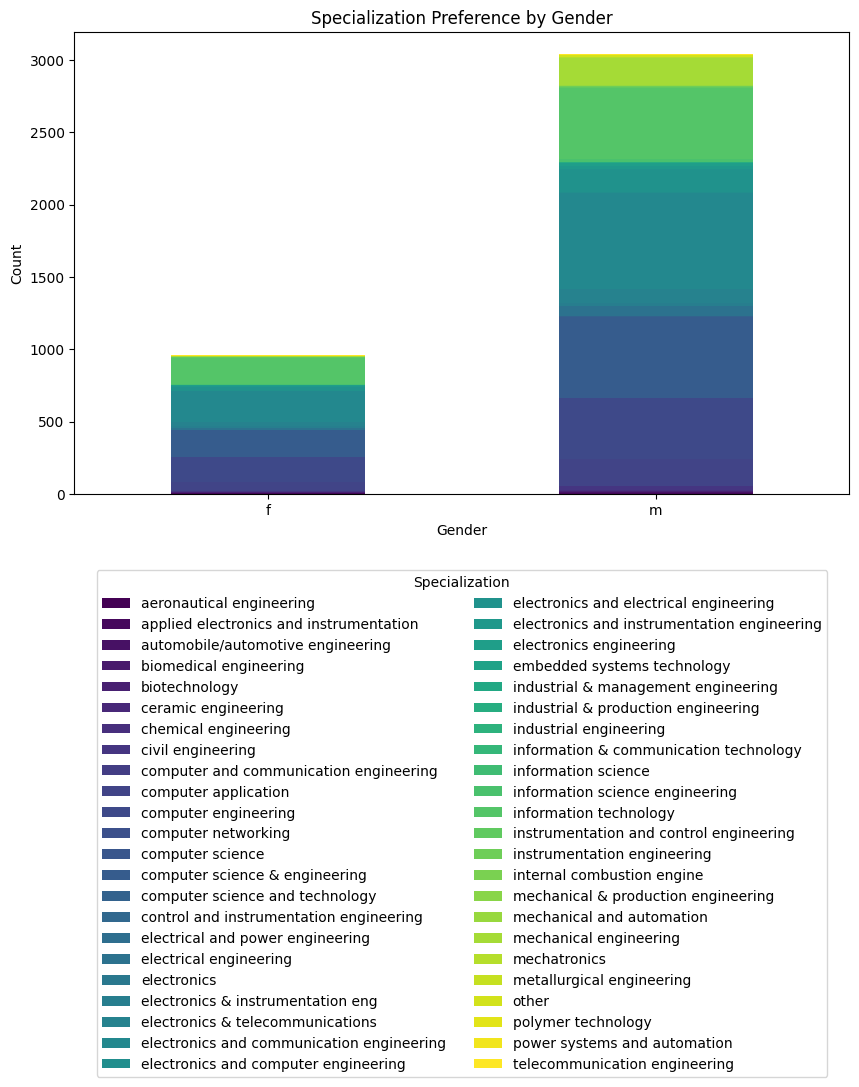

There is a significant relationship between gender and specialization.


In [2]:
from scipy.stats import chi2_contingency

# Drop unnecessary column if it exists
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# **1. Validate Salary Claim (₹2.5-3 LPA) for Fresh CSE Graduates in Specific Roles**

# Define target roles
roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']

# Filter CSE graduates in specific roles
df_cse = df[(df['Specialization'].str.contains('Computer', case=False, na=False)) & 
            (df['Designation'].isin(roles))]

# Check if filtered data is empty
if df_cse.empty:
    print("No matching CSE graduates found in the dataset.")
else:
    # Salary statistics
    salary_stats = df_cse['Salary'].describe()
    print("\nSalary Statistics for CSE Graduates in Specific Roles:")
    print(salary_stats)

    # Visualizing Salary Distribution
    plt.figure(figsize=(8, 5))
    df_cse['Salary'].plot(kind='box')
    plt.title('Salary Distribution for CSE Graduates in Selected Roles')
    plt.ylabel('Salary (LPA)')
    plt.show()

    # Checking if the salary falls within the range 2.5-3 LPA
    within_range = df_cse[(df_cse['Salary'] >= 2.5) & (df_cse['Salary'] <= 3)]

    if len(df_cse) > 0:
        percentage_within_range = (len(within_range) / len(df_cse)) * 100
        print(f"\nPercentage of CSE graduates in selected roles earning between ₹2.5-3 LPA: {percentage_within_range:.2f}%")
    else:
        print("No eligible CSE graduates found in the selected salary range.")

# **2. Correlation Between Gender and Specialization**
if 'Gender' in df.columns and 'Specialization' in df.columns:
    gender_specialization_table = pd.crosstab(df['Gender'], df['Specialization'])

    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(gender_specialization_table)

    print("\nChi-square Test Results:")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"P-value: {p:.4f}")

    # Visualizing Specialization Distribution by Gender
    ax = gender_specialization_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    
    plt.title('Specialization Preference by Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Move legend below the plot
    plt.legend(title='Specialization', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.show()

    # Interpretation
    if p < 0.05:
        print("There is a significant relationship between gender and specialization.")
    else:
        print("There is no significant relationship between gender and specialization.")
else:
    print("Missing 'Gender' or 'Specialization' column in the dataset.")